In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exclude non-country entities (regions, income groups)
non_country_entities  = {
    'AFE', 'AFW', 'ARB', 'CSS', 'CEB', 'CHI', 'EAR', 'EAS', 'TEA', 'EAP', 
    'EMU', 'ECS', 'TEC', 'ECA', 'EUU', 'FCS', 'HPC', 'HIC', 'IBD', 'IBT', 
    'IDB', 'IDX', 'IDA', 'LTE', 'LCN', 'LAC', 'TLA', 'LDC', 'LMY', 'LIC', 
    'LMC', 'MEA', 'TMN', 'MNA', 'MIC', 'NAC', 'OED', 'OSS', 'PSS', 'PST', 
    'PRE', 'SAS', 'TSA', 'SSF', 'TSS', 'SSA', 'SST', 'UMC', 'WLD'
}
df_countries = df[~df['Country Code'].isin(non_country_entities)]

df_non_countries = df[df['Country Code'].isin(non_country_entities)]

print(f"Dataset loaded: {df_countries.shape[0]} rows, {df_countries['Country Name'].nunique()} countries")

#### df = pd.read_csv("gdp.csv")

Dataset loaded: 11129 rows, 213 countries


In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("gdp.csv")

# Exclude non-country entities (regions, income groups)
non_country_entities  = {
    'AFE', 'AFW', 'ARB', 'CSS', 'CEB', 'CHI', 'EAR', 'EAS', 'TEA', 'EAP', 
    'EMU', 'ECS', 'TEC', 'ECA', 'EUU', 'FCS', 'HPC', 'HIC', 'IBD', 'IBT', 
    'IDB', 'IDX', 'IDA', 'LTE', 'LCN', 'LAC', 'TLA', 'LDC', 'LMY', 'LIC', 
    'LMC', 'MEA', 'TMN', 'MNA', 'MIC', 'NAC', 'OED', 'OSS', 'PSS', 'PST', 
    'PRE', 'SAS', 'TSA', 'SSF', 'TSS', 'SSA', 'SST', 'UMC', 'WLD'
}
df_countries = df[~df['Country Code'].isin(non_country_entities)]

df_non_countries = df[df['Country Code'].isin(non_country_entities)]

print(f"Dataset loaded: {df_countries.shape[0]} rows, {df_countries['Country Name'].nunique()} countries")


Dataset loaded: 11129 rows, 213 countries


In [ ]:
aafrom pprint import pprint
pprint(df[["Country Name", "Country Code"]].drop_duplicates().values)

array([['Afghanistan', 'AFG'],
       ['Africa Eastern and Southern', 'AFE'],
       ['Africa Western and Central', 'AFW'],
       ['Albania', 'ALB'],
       ['Algeria', 'DZA'],
       ['American Samoa', 'ASM'],
       ['Andorra', 'AND'],
       ['Angola', 'AGO'],
       ['Antigua and Barbuda', 'ATG'],
       ['Arab World', 'ARB'],
       ['Argentina', 'ARG'],
       ['Armenia', 'ARM'],
       ['Aruba', 'ABW'],
       ['Australia', 'AUS'],
       ['Austria', 'AUT'],
       ['Azerbaijan', 'AZE'],
       ['Bahamas, The', 'BHS'],
       ['Bahrain', 'BHR'],
       ['Bangladesh', 'BGD'],
       ['Barbados', 'BRB'],
       ['Belarus', 'BLR'],
       ['Belgium', 'BEL'],
       ['Belize', 'BLZ'],
       ['Benin', 'BEN'],
       ['Bermuda', 'BMU'],
       ['Bhutan', 'BTN'],
       ['Bolivia', 'BOL'],
       ['Bosnia and Herzegovina', 'BIH'],
       ['Botswana', 'BWA'],
       ['Brazil', 'BRA'],
       ['Brunei Darussalam', 'BRN'],
       ['Bulgaria', 'BGR'],
       ['Burkina Faso', 'BFA'],
    

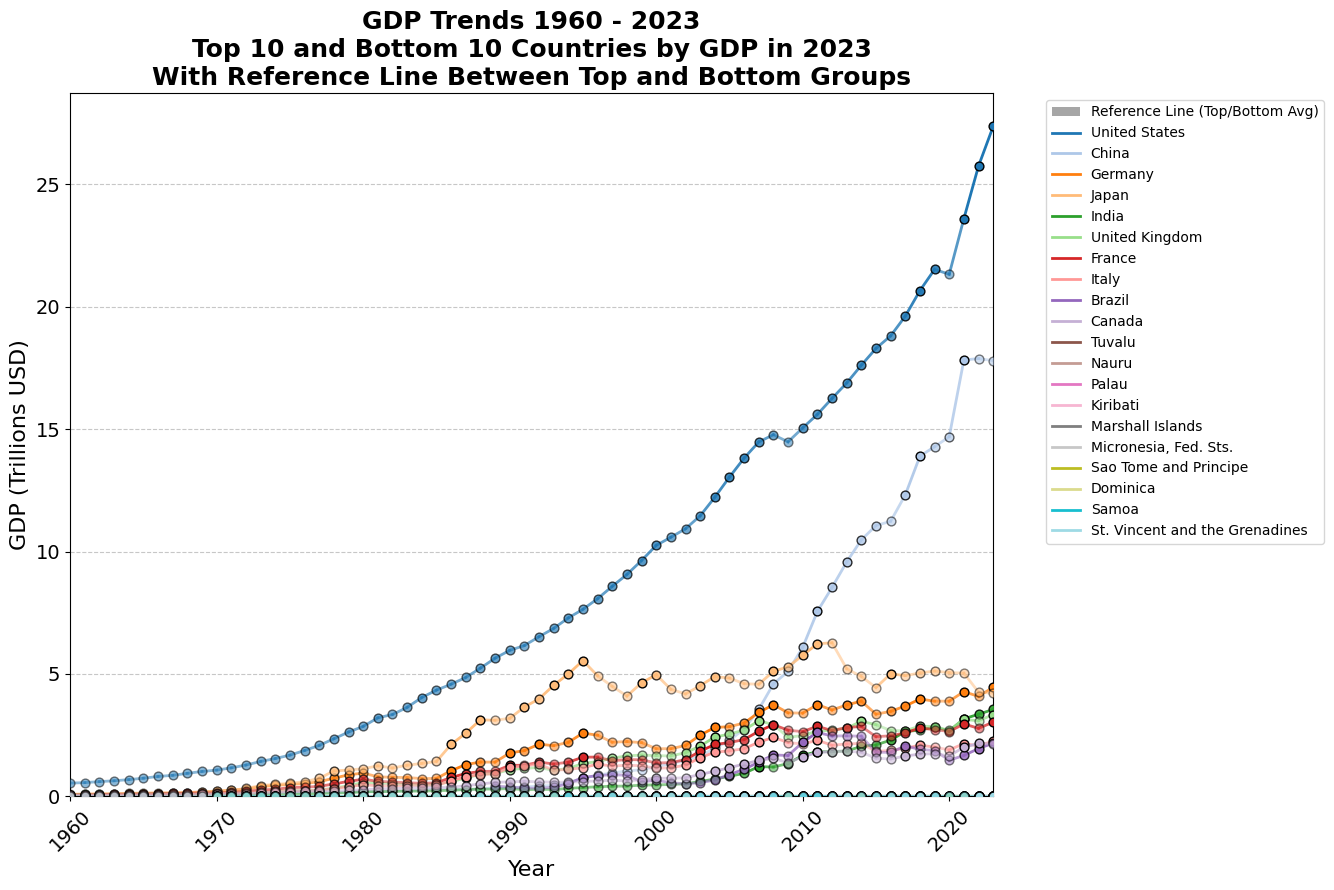

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Countries/territories to exclude (groups, regions, income classifications)
exclude_codes = {
    'AFE', 'AFW', 'ARB', 'CSS', 'CEB', 'CHI', 'EAR', 'EAS', 'TEA', 'EAP', 
    'EMU', 'ECS', 'TEC', 'ECA', 'EUU', 'FCS', 'HPC', 'HIC', 'IBD', 'IBT', 
    'IDB', 'IDX', 'IDA', 'LTE', 'LCN', 'LAC', 'TLA', 'LDC', 'LMY', 'LIC', 
    'LMC', 'MEA', 'TMN', 'MNA', 'MIC', 'NAC', 'OED', 'OSS', 'PSS', 'PST', 
    'PRE', 'SAS', 'TSA', 'SSF', 'TSS', 'SSA', 'SST', 'UMC', 'WLD'
}

# Check column names and filter accordingly
if 'Country Code' in df.columns:
    df_countries_only = df[~df['Country Code'].isin(exclude_codes)]
elif 'country_code' in df.columns:
    df_countries_only = df[~df['country_code'].isin(exclude_codes)]
else:
    # Fallback: filter by country name patterns if no code column
    df_countries_only = df.copy()

# Latest year
latest_year = df_countries_only['Year'].max()
df_latest = df_countries_only[df_countries_only['Year'] == latest_year]

# Select top 10 and bottom 10 countries by GDP in latest year
top10 = df_latest.nlargest(10, 'Value')['Country Name'].tolist()
bottom10 = df_latest.nsmallest(10, 'Value')['Country Name'].tolist()
selected_countries = top10 + bottom10

# Filter main dataframe for selected countries from 1960
df_filtered = df_countries_only[(df_countries_only['Country Name'].isin(selected_countries)) & (df_countries_only['Year'] >= 1960)].copy()
df_filtered['GDP (Trillions)'] = df_filtered['Value'] / 1e12

# Calculate reference line based on selected countries
# Use geometric mean of top10 avg and bottom10 avg to position bars between them
df_top = df_filtered[df_filtered['Country Name'].isin(top10)]
df_bottom = df_filtered[df_filtered['Country Name'].isin(bottom10)]

top_avg = df_top.groupby('Year')['Value'].mean().reset_index()
bottom_avg = df_bottom.groupby('Year')['Value'].mean().reset_index()

# Merge and calculate geometric mean for reference
reference_df = top_avg.merge(bottom_avg, on='Year', suffixes=('_top', '_bottom'))
reference_df['Value'] = np.sqrt(reference_df['Value_top'] * reference_df['Value_bottom'])
reference_df = reference_df[reference_df['Year'] >= 1960].copy()
reference_df['GDP (Trillions)'] = reference_df['Value'] / 1e12

# Calculate trend for opacity
reference_df['Trend'] = reference_df['GDP (Trillions)'].diff().fillna(0)
reference_df['Opacity'] = np.where(reference_df['Trend'] >= 0, 1.0, 0.3)

fig, ax = plt.subplots(figsize=(16, 9))

# Plot reference bars with opacity per trend
for idx, row in reference_df.iterrows():
    ax.bar(row['Year'], row['GDP (Trillions)'], color='grey', alpha=row['Opacity'], width=0.7,
        label='Reference Line (Top/Bottom Avg)' if idx == 0 else "")

# Assign distinct colors for countries
colors = plt.cm.tab20.colors
country_colors = {}  # Store color mapping for legend

# Plot country GDP lines with opacity
for i, country in enumerate(selected_countries):
    country_data = df_filtered[df_filtered['Country Name'] == country]
    if len(country_data) == 0:
        continue
        
    gdp_vals = country_data['GDP (Trillions)'].values
    years = country_data['Year'].values
    
    # Calculate trend for opacity
    trend = np.diff(gdp_vals, prepend=gdp_vals[0])
    if len(trend) > 0:
        max_trend = np.max(np.abs(trend))
        if max_trend > 0:
            alphas = np.clip(0.5 + (trend / max_trend), 0.5, 1.0)
        else:
            alphas = np.full(len(trend), 0.7)
    else:
        alphas = [0.7]
    
    color = colors[i % len(colors)]
    country_colors[country] = color
    
    # Plot line segments
    for j in range(len(country_data) - 1):
        ax.plot(years[j:j + 2], gdp_vals[j:j + 2], color=color,
                alpha=(alphas[j] + alphas[j + 1]) / 2, linewidth=2)
    
    # Plot markers
    for j, yr in enumerate(years):
        ax.scatter(yr, gdp_vals[j], color=color, alpha=alphas[j], edgecolor='black',
                s=40, zorder=5)

# Create custom legend with correct colors
legend_elements = []
# Add reference line first
legend_elements.append(plt.Rectangle((0,0),1,1, facecolor='grey', alpha=0.7, label='Reference Line (Top/Bottom Avg)'))

# Add countries with their colors
for country in selected_countries:
    if country in country_colors:
        legend_elements.append(plt.Line2D([0], [0], color=country_colors[country], 
                                        linewidth=2, label=country))

# Title with multiline describing selection
title_text = ("GDP Trends 1960 - {}\n"
            "Top 10 and Bottom 10 Countries by GDP in {}\n"
            "With Reference Line Between Top and Bottom Groups").format(latest_year, latest_year)

ax.set_title(title_text, fontsize=18, weight='bold')
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('GDP (Trillions USD)', fontsize=16)
ax.legend(handles=legend_elements, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(1960, latest_year)
plt.xticks(rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make room for legend on right
plt.show()

In [9]:
mask = df_countries_only["Country Name"].str.startswith("Tu")
df_countries_only[mask].sample(n=20)

,Country Name,Country Code,Year,Value
13060,Turks and Caicos Islands,TCA,2017,1.028942e+09
12948,Turkiye,TUR,1965,1.196667e+10
12992,Turkiye,TUR,2009,6.492893e+11
12900,Tunisia,TUN,1981,8.428445e+09
12935,Tunisia,TUN,2016,4.436007e+10
12980,Turkiye,TUR,1997,1.898784e+11
12926,Tunisia,TUN,2007,3.891535e+10
13034,Turkmenistan,TKM,2014,4.352421e+10
13082,Tuvalu,TUV,1985,3.862852e+06
13102,Tuvalu,TUV,2005,2.290998e+07
